In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp

from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, f1_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
holistic = mp_holistic.Holistic(min_detection_confidence = 0.8, min_tracking_confidence = 0.5)

In [3]:
IMAGESET_FOLDER = os.path.join('Imageset')
KEYPOINT_FOLDER = os.path.join('Extracted Hand Landmarks')
DATASET_FOLDER = os.path.join('Dataset')
actions = np.array(['I_word', 'hello', 'my', 'india'])
no_sequences = 120
no_frames = 30

In [4]:
log_dir = os.path.join('Logs')
tb_callbacks = TensorBoard(log_dir = log_dir)

In [47]:
label_map = {label:num for num, label in enumerate(actions)}

sequences, labels= [], []
for action in range(len(actions)):
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(no_frames):
            res = np.load(os.path.join(DATASET_FOLDER, actions[action], str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[actions[action]])
        
x = np.array(sequences)
y = to_categorical(labels).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [48]:
x_train.shape

(384, 30, 178)

In [49]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30, 178)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            62208     
                                                                 
 lstm_13 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 4)                 132       
                                                                 
Total params: 216,804
Trainable params: 216,804
Non-tr

In [59]:
learn = model.fit(
    x_train, 
    y_train, 
    validation_data = (x_test, y_test), 
    epochs = 200, 
    callbacks = [tb_callbacks]
)

Epoch 1/200
12/12 [==============================] - 1s 50ms/step - loss: 2.2662 - categorical_accuracy: 0.9115 - val_loss: 8.5385 - val_categorical_accuracy: 0.9375
Epoch 2/200
12/12 [==============================] - 1s 48ms/step - loss: 2.1514 - categorical_accuracy: 0.9167 - val_loss: 6.2117 - val_categorical_accuracy: 0.8125
Epoch 3/200
12/12 [==============================] - 1s 45ms/step - loss: 2.8685 - categorical_accuracy: 0.9089 - val_loss: 2.3242 - val_categorical_accuracy: 0.9062
Epoch 4/200
12/12 [==============================] - 1s 48ms/step - loss: 2.1260 - categorical_accuracy: 0.9193 - val_loss: 4.9970 - val_categorical_accuracy: 0.8958
Epoch 5/200
12/12 [==============================] - 1s 47ms/step - loss: 3.9859 - categorical_accuracy: 0.9036 - val_loss: 2.7896 - val_categorical_accuracy: 0.9583
Epoch 6/200
12/12 [==============================] - 1s 51ms/step - loss: 10.1907 - categorical_accuracy: 0.8984 - val_loss: 15.6293 - val_categorical_accuracy: 0.9479
Ep

Epoch 50/200
12/12 [==============================] - 1s 45ms/step - loss: 53.0387 - categorical_accuracy: 0.2083 - val_loss: 19.2918 - val_categorical_accuracy: 0.2917
Epoch 51/200
12/12 [==============================] - 1s 44ms/step - loss: 35.4326 - categorical_accuracy: 0.2552 - val_loss: 30.5877 - val_categorical_accuracy: 0.3438
Epoch 52/200
12/12 [==============================] - 1s 47ms/step - loss: 19.0806 - categorical_accuracy: 0.3281 - val_loss: 26.5764 - val_categorical_accuracy: 0.1771
Epoch 53/200
12/12 [==============================] - 1s 43ms/step - loss: 27.3250 - categorical_accuracy: 0.2891 - val_loss: 77.7948 - val_categorical_accuracy: 0.2917
Epoch 54/200
12/12 [==============================] - 1s 44ms/step - loss: 40.7738 - categorical_accuracy: 0.2995 - val_loss: 38.7593 - val_categorical_accuracy: 0.2292
Epoch 55/200
12/12 [==============================] - 1s 44ms/step - loss: 24.4196 - categorical_accuracy: 0.2734 - val_loss: 26.6660 - val_categorical_acc

Epoch 99/200
12/12 [==============================] - 1s 42ms/step - loss: 0.1252 - categorical_accuracy: 0.9661 - val_loss: 0.5622 - val_categorical_accuracy: 0.9167
Epoch 100/200
12/12 [==============================] - 1s 47ms/step - loss: 0.1127 - categorical_accuracy: 0.9740 - val_loss: 0.4758 - val_categorical_accuracy: 0.9688
Epoch 101/200
12/12 [==============================] - 1s 45ms/step - loss: 0.0735 - categorical_accuracy: 0.9740 - val_loss: 0.4357 - val_categorical_accuracy: 0.9792
Epoch 102/200
12/12 [==============================] - 1s 44ms/step - loss: 0.1126 - categorical_accuracy: 0.9714 - val_loss: 0.4554 - val_categorical_accuracy: 0.9792
Epoch 103/200
12/12 [==============================] - 1s 43ms/step - loss: 0.1288 - categorical_accuracy: 0.9505 - val_loss: 0.4671 - val_categorical_accuracy: 0.9792
Epoch 104/200
12/12 [==============================] - 1s 44ms/step - loss: 0.1032 - categorical_accuracy: 0.9740 - val_loss: 0.4758 - val_categorical_accuracy: 

Epoch 148/200
12/12 [==============================] - 1s 45ms/step - loss: 0.0501 - categorical_accuracy: 0.9870 - val_loss: 0.3356 - val_categorical_accuracy: 0.9792
Epoch 149/200
12/12 [==============================] - 1s 44ms/step - loss: 0.0949 - categorical_accuracy: 0.9766 - val_loss: 0.3614 - val_categorical_accuracy: 0.9792
Epoch 150/200
12/12 [==============================] - 1s 47ms/step - loss: 0.0567 - categorical_accuracy: 0.9792 - val_loss: 0.3591 - val_categorical_accuracy: 0.9896
Epoch 151/200
12/12 [==============================] - 1s 42ms/step - loss: 0.0750 - categorical_accuracy: 0.9740 - val_loss: 0.3964 - val_categorical_accuracy: 0.9583
Epoch 152/200
12/12 [==============================] - 1s 44ms/step - loss: 0.0559 - categorical_accuracy: 0.9818 - val_loss: 0.4699 - val_categorical_accuracy: 0.9479
Epoch 153/200
12/12 [==============================] - 1s 42ms/step - loss: 0.0540 - categorical_accuracy: 0.9844 - val_loss: 0.4137 - val_categorical_accuracy:

Epoch 197/200
12/12 [==============================] - 1s 42ms/step - loss: 0.2235 - categorical_accuracy: 0.9609 - val_loss: 0.6419 - val_categorical_accuracy: 0.9792
Epoch 198/200
12/12 [==============================] - 1s 47ms/step - loss: 0.2102 - categorical_accuracy: 0.9740 - val_loss: 1.6512 - val_categorical_accuracy: 0.8333
Epoch 199/200
12/12 [==============================] - 1s 44ms/step - loss: 0.3879 - categorical_accuracy: 0.9427 - val_loss: 0.8215 - val_categorical_accuracy: 0.9375
Epoch 200/200
12/12 [==============================] - 1s 45ms/step - loss: 0.1989 - categorical_accuracy: 0.9740 - val_loss: 0.8027 - val_categorical_accuracy: 0.9792


In [67]:
# model.save('SingleFixed.h5')

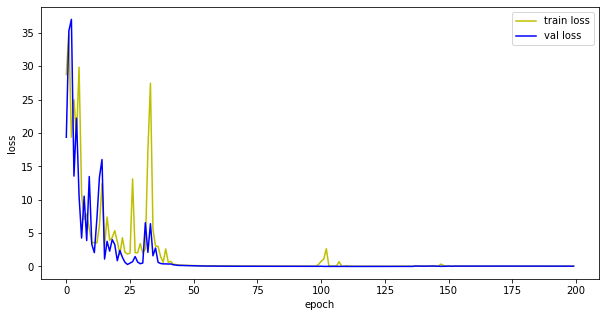

In [56]:
fig, loss_graph = plt.subplots(figsize=(10, 5))
# acc_ax = loss_ax.twinx()

loss_graph.plot(learn.history['loss'], 'y', label='train loss')
loss_graph.plot(learn.history['val_loss'], 'b', label='val loss')
loss_graph.set_xlabel('epoch')
loss_graph.set_ylabel('loss')
loss_graph.legend(loc = 'upper right')
plt.savefig('SingleFixed_loss_plot_curve.jpg')
plt.show()

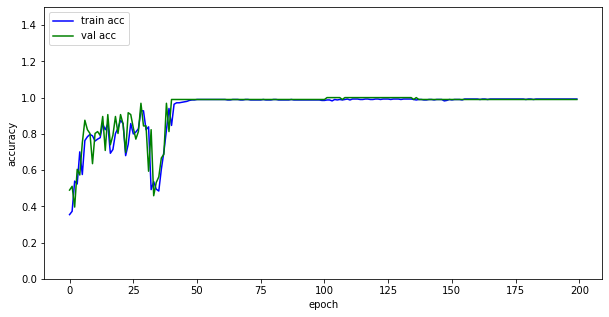

In [57]:
fig, acc_graph = plt.subplots(figsize = (10, 5))

acc_graph.plot(learn.history['categorical_accuracy'], 'b', label='train acc')
acc_graph.plot(learn.history['val_categorical_accuracy'], 'g', label='val acc')
acc_graph.set_xlabel('epoch')
acc_graph.set_ylabel('accuracy')
acc_graph.set_ylim([0, 1.5])
acc_graph.legend(loc = 'upper left')
plt.savefig('SingleFixed_train_plot_curve.jpg')
plt.show()

In [60]:
x_pred = model.predict(x_test)

In [61]:
y_true = np.argmax(y_test, axis = 1).tolist()

In [62]:
x_pred = np.argmax(x_pred, axis = 1).tolist()

In [63]:
x_pred

[2,
 3,
 0,
 0,
 1,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 3,
 3,
 1,
 1,
 0,
 3,
 0,
 2,
 0,
 1,
 3,
 3,
 2,
 2,
 2,
 1,
 3,
 0,
 0,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 3,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 2,
 2,
 2,
 2,
 3,
 0,
 1,
 3,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1]

In [64]:
y_true

[2,
 3,
 0,
 0,
 1,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 3,
 3,
 1,
 1,
 0,
 3,
 0,
 2,
 0,
 1,
 3,
 3,
 2,
 2,
 2,
 1,
 3,
 0,
 0,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 3,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 2,
 3,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 2,
 2,
 2,
 2,
 3,
 0,
 1,
 3,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1]

In [65]:
mul_conf_mx = multilabel_confusion_matrix(y_true, x_pred)

In [49]:
mul_conf_mx

array([[[70,  0],
        [ 1, 25]],

       [[77,  0],
        [ 0, 19]],

       [[71,  1],
        [ 0, 24]],

       [[69,  0],
        [ 0, 27]]], dtype=int64)

In [50]:
conf_mx = confusion_matrix(y_true, x_pred)

In [51]:
conf_mx

array([[25,  0,  1,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 24,  0],
       [ 0,  0,  0, 27]], dtype=int64)

In [66]:
# accuracy_score(y_true, x_pred)

0.9791666666666666

In [52]:
accuracy_score(y_true, x_pred)

0.9895833333333334

In [58]:
f1_score(y_true, x_pred, average = 'weighted')

0.9895875016673336

[0. 1. 2. 3.]


<Figure size 6480x6480 with 0 Axes>

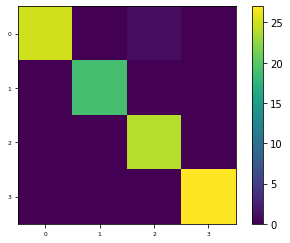

<Figure size 6480x6480 with 0 Axes>

In [59]:
ticks = np.linspace(0, 3, num = 4)
print(ticks)
# ticks = actions
plt.imshow(conf_mx, interpolation = 'none')
plt.colorbar()
plt.xticks(ticks, fontsize = 6)
plt.yticks(ticks, fontsize = 6)
plt.savefig('SingleFixed_confusion_matrix.jpg')
plt.figure(figsize = (90, 90))